In [2]:
import pandas as pd
import seaborn as sns

In [6]:
df_engine=pd.read_csv("/content/engine_data.csv")
df_engine.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
df_engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [8]:
df_engine.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [10]:
import matplotlib.pyplot as plt


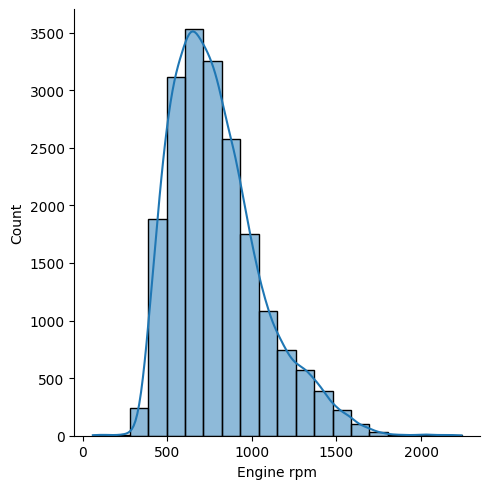

In [11]:
sns.displot(data=df_engine['Engine rpm'], bins= 20, kde= True)
plt.show()

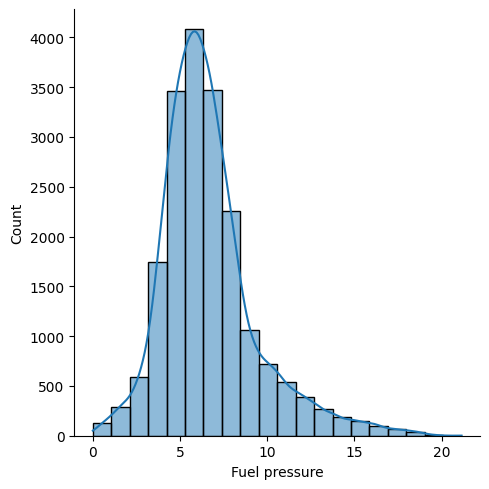

In [12]:
sns.displot(data=df_engine['Fuel pressure'], bins= 20, kde= True)
plt.show()

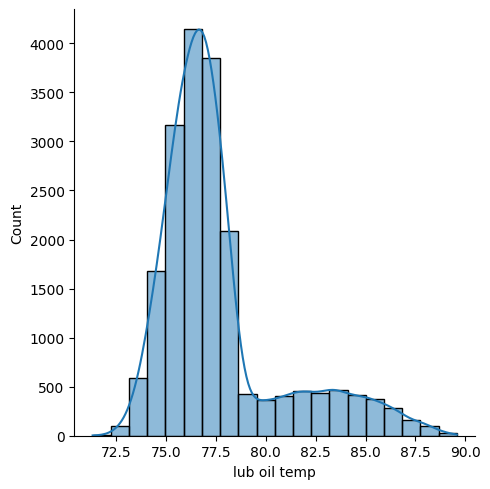

In [13]:
sns.displot(data=df_engine['lub oil temp'], bins= 20, kde= True)
plt.show()

In [14]:
X=df_engine.iloc[:,:-1]
Y=df_engine.iloc[:,-1]
print(X)
print(Y)

       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0             700          2.493592      11.790927          3.178981   
1             876          2.941606      16.193866          2.464504   
2             520          2.961746       6.553147          1.064347   
3             473          3.707835      19.510172          3.727455   
4             619          5.672919      15.738871          2.052251   
...           ...               ...            ...               ...   
19530         902          4.117296       4.981360          4.346564   
19531         694          4.817720      10.866701          6.186689   
19532         684          2.673344       4.927376          1.903572   
19533         696          3.094163       8.291816          1.221729   
19534         504          3.775246       3.962480          2.038647   

       lub oil temp  Coolant temp  
0         84.144163     81.632187  
1         77.640934     82.445724  
2         77.752266     79.

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.20)


In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
x_train_scaled[0:5]

array([[-1.12826044, -1.14056418, -0.35328936,  0.98982824, -0.43838272,
        -0.60276969],
       [ 0.44233885, -1.16929914, -0.45969847, -0.6029332 , -0.69850073,
         0.23711477],
       [-1.00141869, -0.30366613, -0.67754088,  0.33252869, -0.23087621,
        -0.32885193],
       [-0.24036821, -0.3654167 ,  0.5917418 , -0.98387576,  0.17386173,
        -1.14968912],
       [-0.46793722,  0.21990132,  0.71876967, -0.23561792, -1.16363413,
        -1.88982421]])

In [17]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_train_scaled.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,-1.128260,-1.140564,-0.353289,0.989828,-0.438383,-0.602770
1,0.442339,-1.169299,-0.459698,-0.602933,-0.698501,0.237115
2,-1.001419,-0.303666,-0.677541,0.332529,-0.230876,-0.328852
3,-0.240368,-0.365417,0.591742,-0.983876,0.173862,-1.149689
4,-0.467937,0.219901,0.718770,-0.235618,-1.163634,-1.889824


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RFC_model = RandomForestClassifier()
RFC_model.fit(x_train_scaled, y_train)
y_pred_RFC = RFC_model.predict(x_test_scaled)

from sklearn import metrics

print('Acuuracy Score: {}'.format((accuracy_score(y_test, y_pred_RFC) * 100)))

Acuuracy Score: 63.731763501407734


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
y_pred = RFC_model.predict(x_test)


cm = confusion_matrix(y_test, y_pred_RFC)
print(cm)



[[ 556  903]
 [ 514 1934]]


In [25]:
accuracy_score(y_test,y_pred)


0.6304069618633222

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.04      0.07      1459
           1       0.63      0.98      0.77      2448

    accuracy                           0.63      3907
   macro avg       0.60      0.51      0.42      3907
weighted avg       0.61      0.63      0.51      3907

